Kütüphaneler

In [16]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K 
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers, activations 

import pylab as plt
import matplotlib.pyplot as plt
import numpy as np

Veri Yükleme

In [17]:
base_dir = "../../veriler/tensorflow_f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="training", batch_size=2)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="validation", batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [18]:
train_datagen

Görselleştirme

(2, 500, 500, 3)
[0. 1. 0. 0.]


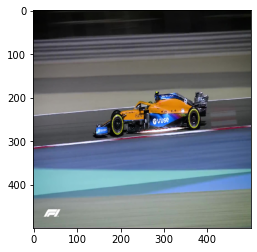

(2, 500, 500, 3)
[0. 0. 1. 0.]


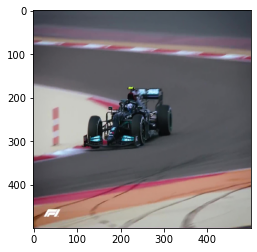

(2, 500, 500, 3)
[0. 0. 1. 0.]


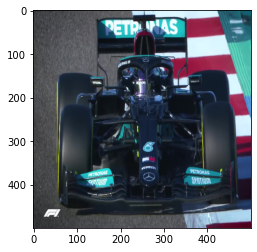

(2, 500, 500, 3)
[0. 0. 1. 0.]


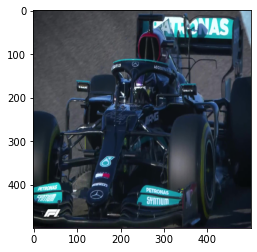

(2, 500, 500, 3)
[0. 1. 0. 0.]


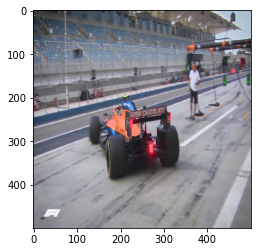

In [19]:
for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)

    plt.imshow(img[0])
    print(label[0])
    plt.show()

Sequential Model

In [20]:
model = Sequential()
model

In [21]:
model.add(layers.Conv2D(filters=4, activation="elu", kernel_size=(5,5), input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=8, activation="elu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=16, activation="elu", kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=32, activation="elu", kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(4, activation="softmax"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 248, 248, 4)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 16)      

Callbacks

In [23]:
import math
epoch = 5
initial_learning_rate = 0.001

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 1.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/ epochs_drop))

In [24]:
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
 

In [25]:
callbacks = [

    CSVLogger("../callbacks/traing.csv", separator="-"),
    TensorBoard("../callbacks/logs", write_graph=True, write_images=1),
    ModelCheckpoint("../callbacks/best.h5", verbose=1, save_best_only=True, save_weights_only=True, monitor="loss"),
    LearningRateScheduler(lr_step_decay, verbose=1),
    EarlyStopping(monitor="loss",verbose=1, mode="auto")
]

In [26]:
callbacks

Modelin Eğitimi

In [27]:
optimizer = tf.keras.optimizers.Adamax(learning_rate= 0.001)
loss = tf.keras.losses.CategoricalCrossentropy()


In [28]:
model.compile(optimizer=optimizer, loss=loss, metrics=["mse", "accuracy"])


In [29]:
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen, callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/5
126/126 [==============================] - ETA: 0s - loss: 1.5057 - mse: 0.1917 - accuracy: 0.3413
Epoch 1: loss improved from inf to 1.50571, saving model to ../callbacks\best.h5
126/126 [==============================] - 23s 176ms/step - loss: 1.5057 - mse: 0.1917 - accuracy: 0.3413 - val_loss: 1.4449 - val_mse: 0.1920 - val_accuracy: 0.2500 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0005.
Epoch 2/5
126/126 [==============================] - ETA: 0s - loss: 0.5899 - mse: 0.0747 - accuracy: 0.8571
Epoch 2: loss improved from 1.50571 to 0.58986, saving model to ../callbacks\best.h5
126/126 [==============================] - 22s 174ms/step - loss: 0.5899 - mse: 0.0747 - accuracy: 0.8571 - val_loss: 1.3408 - val_mse: 0.1713 - val_accuracy: 0.5357 - lr: 5.0000e-04
Epoch 2: early stopping


In [30]:
import tensorboard

In [31]:
result.history

{'loss': [1.5057071447372437, 0.5898566842079163],
 'mse': [0.1917392611503601, 0.07469789683818817],
 'accuracy': [0.341269850730896, 0.8571428656578064],
 'val_loss': [1.4449349641799927, 1.34078848361969],
 'val_mse': [0.19200025498867035, 0.1712544709444046],
 'val_accuracy': [0.25, 0.5357142686843872],
 'lr': [0.001, 0.0005]}

Learning Rate

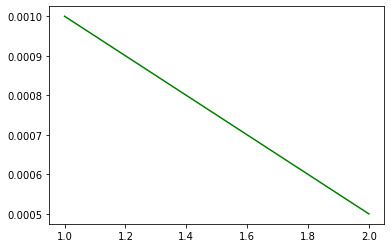

In [32]:
epoch = range(1, len(result.history["accuracy"])+1)
plt.plot(epoch, result.history["lr"] , color="g")
plt.show()